Headers: ['Scottie Scheffler', 'Rory McIlroy', 'Collin Morikawa', 'Corey Conners', 'Xander Schauffele']
Stat Name: SG: Total, Row Data: ['2.842', '1.723', '0.943', '0.879', '-']
Stat Name: SG: Off the Tee, Row Data: ['0.947', '0.861', '0.494', '0.380', '-']
Stat Name: SG: Approach the Green, Row Data: ['1.348', '0.453', '0.161', '0.997', '-']
Stat Name: SG: Around the Green, Row Data: ['0.446', '0.106', '0.401', '-0.207', '-']
Stat Name: SG: Putting, Row Data: ['0.100', '0.302', '-0.114', '-0.291', '-']
                       Scottie Scheffler Rory McIlroy Collin Morikawa  \
SG: Total                          2.842        1.723           0.943   
SG: Off the Tee                    0.947        0.861           0.494   
SG: Approach the Green             1.348        0.453           0.161   
SG: Around the Green               0.446        0.106           0.401   
SG: Putting                        0.100        0.302          -0.114   

                       Corey Conners Xander Schauffe

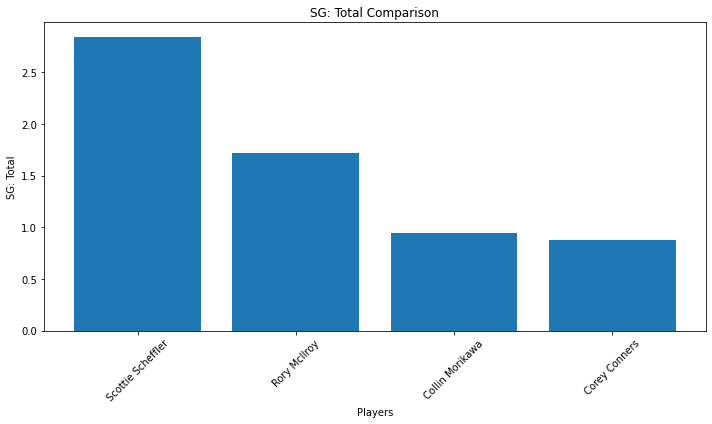

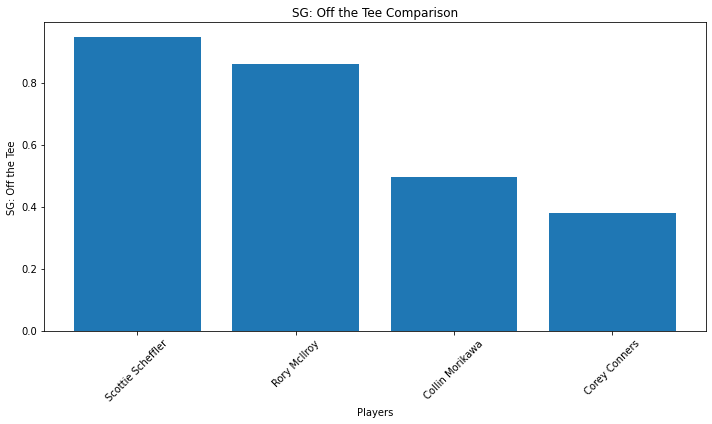

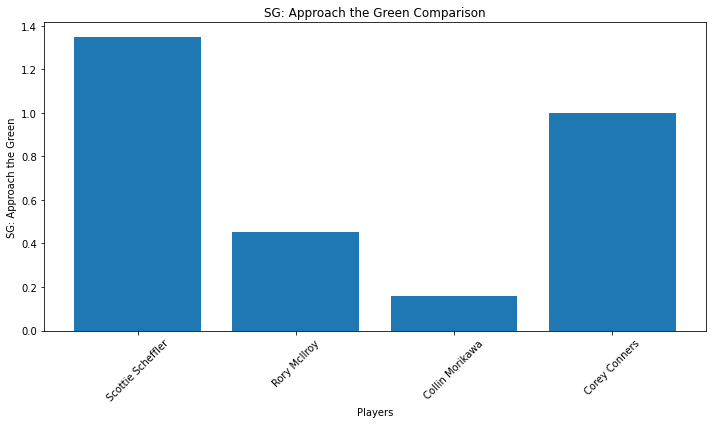

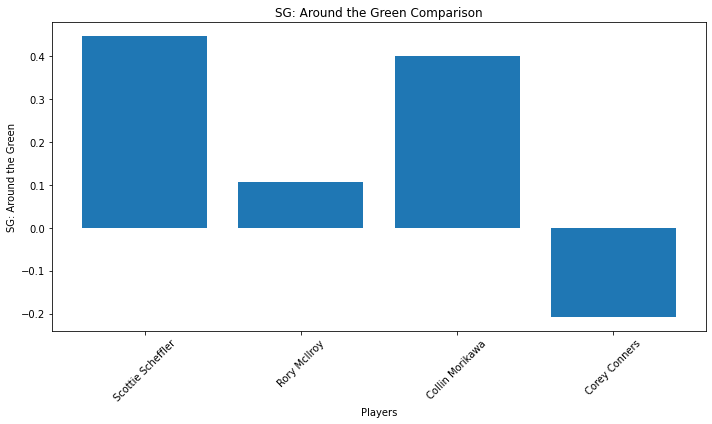

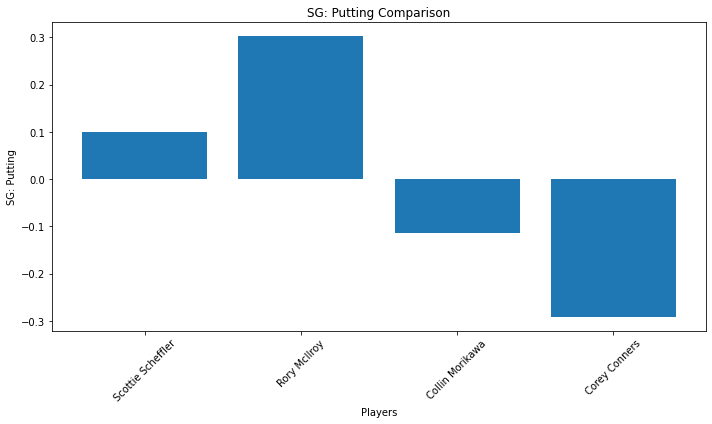

In [32]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

# Define the URL and headers for the API request
url = "https://orchestrator.pgatour.com/graphql"
headers = {
    "authority": "orchestrator.pgatour.com",
    "accept": "*/*",
    "accept-language": "en-US,en;q=0.9",
    "content-type": "application/json",
    "origin": "https://www.pgatour.com",
    "referer": "https://www.pgatour.com/",
    "sec-ch-ua": '"Chromium";v="122", "Not(A:Brand";v="24", "Google Chrome";v="122"',
    "sec-ch-ua-mobile": "?1",
    "sec-ch-ua-platform": '"Android"',
    "sec-fetch-dest": "empty",
    "sec-fetch-mode": "cors",
    "sec-fetch-site": "same-site",
    "user-agent": "Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Mobile Safari/537.36",
    "x-amz-user-agent": "aws-amplify/3.0.7",
    "x-api-key": "da2-gsrx5bibzbb4njvhl7t37wqyl4",
    "x-pgat-platform": "web",
}

# Define the GraphQL query
query = {
    "operationName": "PlayerComparison",
    "variables": {
        "tourCode": "R",
        "playerIds": ["46046","28237", "50525","39997","53572","48081"],
        "year": 2024
    },
    "query": """
    query PlayerComparison($tourCode: TourCode!, $playerIds: [String!]!, $category: PlayerComparisonCategory, $year: Int, $tournamentId: String) {
      playerComparison(
        tourCode: $tourCode
        playerIds: $playerIds
        category: $category
        year: $year
        tournamentId: $tournamentId
      ) {
        category
        year
        table {
          header
          headerRow {
            playerId
            displayText
            country
          }
          rows {
            statName
            statId
            values {
              displayValue
              bold
              rankDeviation
              rank
            }
          }
        }
      }
    }
    """
}

# Send the request to the GraphQL API
response = requests.post(url, headers=headers, json=query)
data = response.json()

# Extract data
table_data = data['data']['playerComparison']['table']
header_row = table_data['headerRow']
rows = table_data['rows']

# Convert headers to list of player names
headers = [header['displayText'] for header in header_row]

# Debugging: print the headers
print("Headers:", headers)

# Convert rows to DataFrame
rows_data = []
stat_names = []
for row in rows:
    row_data = [value['displayValue'] for value in row['values']]
    # Remove the last value to match the number of headers
    if len(row_data) > len(headers):
        row_data = row_data[:len(headers)]
    # Debugging: print the row data and stat names
    print(f"Stat Name: {row['statName']}, Row Data: {row_data}")
    rows_data.append(row_data)
    stat_names.append(row['statName'])

df = pd.DataFrame(rows_data, columns=headers, index=stat_names)
print(df)

# Plotting the data
df = df.apply(pd.to_numeric, errors='coerce')

# Bar plot for each statistic
for stat in df.index:
    plt.figure(figsize=(10, 6))
    plt.bar(df.columns, df.loc[stat])
    plt.title(f'{stat} Comparison')
    plt.xlabel('Players')
    plt.ylabel(stat)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
